In [1]:

from dpsgd_keras_slow import *
import numpy as np
import pickle 
from matplotlib import pyplot as plt
training_sample = 60000
batch_size = 500
steps_in_one_epoch = training_sample // batch_size
steps_in_one_epoch

2023-07-04 18:47:37.131997: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


120

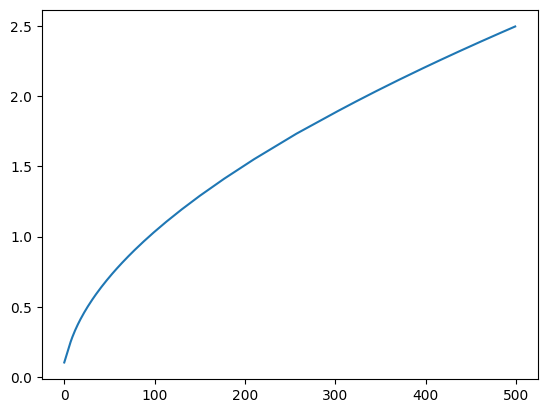

In [10]:
# get the noise:
# compare it with the original paper
epsilons = []
max_step = 50000
for step in range(1, max_step, 100):
    epsilons.append(compute_epsilon(step, 0.01, 4))
# plot the noise
plt.plot(epsilons)


有点像，但不完全是。

In [ ]:
# extra work: calculate how much epochs are needed to achieve the same privacy level under different noise level
target_epsilon = 1.0
noise_level = [1,2,4,8]
epochs_needed = []
def compute_epsilon_inverse(target_epsilon, q, noise):
    target_epoch = 1
    while compute_epsilon(target_epoch * steps_in_one_epoch, q, noise) < target_epsilon:
        target_epoch += 1
    return target_epoch - 1

for noise in noise_level:
    epochs_needed.append(compute_epsilon_inverse(target_epsilon, 1/steps_in_one_epoch, noise))
plt.plot(noise_level, epochs_needed)